<a href="https://colab.research.google.com/github/Cyber-Mood/PyNB/blob/main/Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is created by Tanjila and Mahmud for AI Course Lab Task.
```
ID: 222-115-176  
ID: 222-115-191
```

# Diabetes Dataset | Exploratory Data Analysis (EDA)

This notebook performs an **Exploratory Data Analysis** on the Diabetes dataset to understand its structure, distributions, and relationships between features and the target variable (disease progression). Then **Preprocess** the data to find the null values (if any) and point out the outliers to understand the range of values in the dataset. Then runs **Models** to fit the datasets and **Evaluate** their performance.

#EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame
print(df.head())
print(f'Shape: {df.shape}')
print(f'Types: {df.dtypes}')

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Shape: (442, 11)
Types: age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


## Visualize data distribution



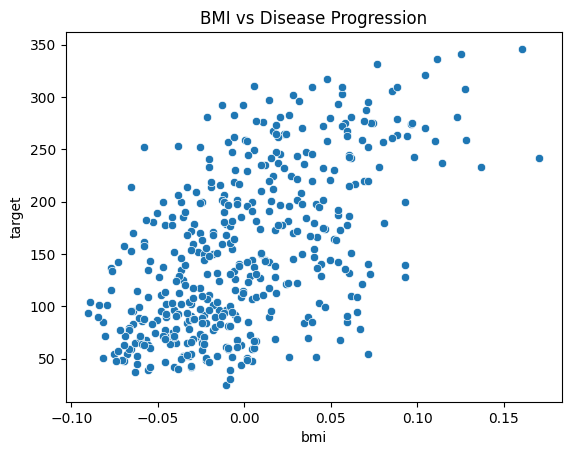

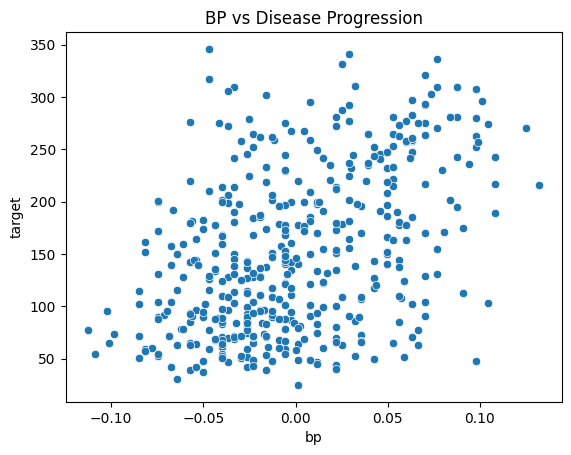

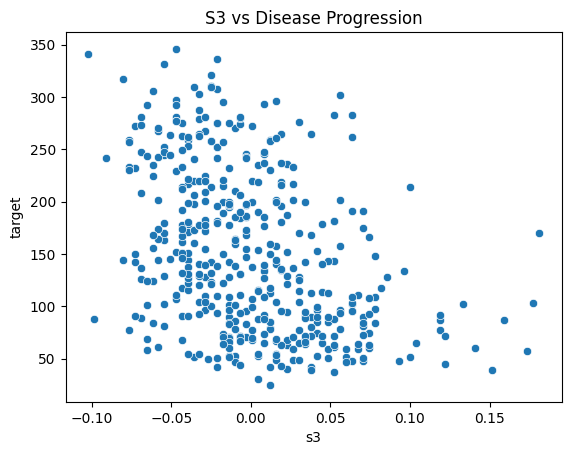

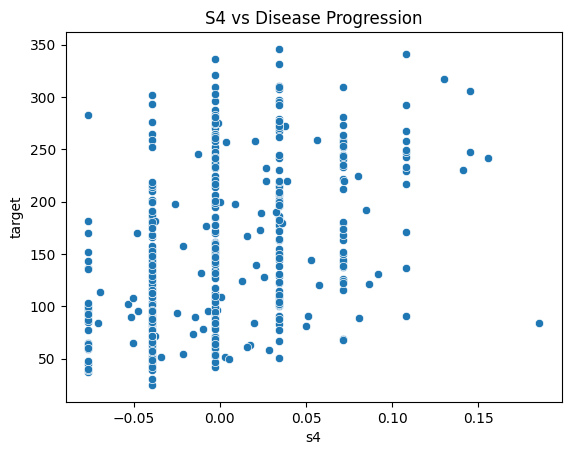

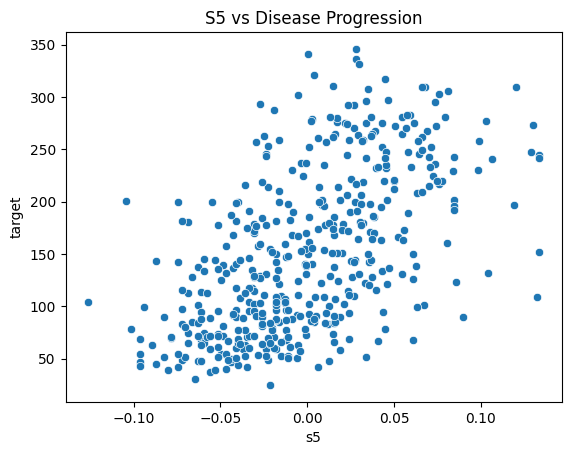

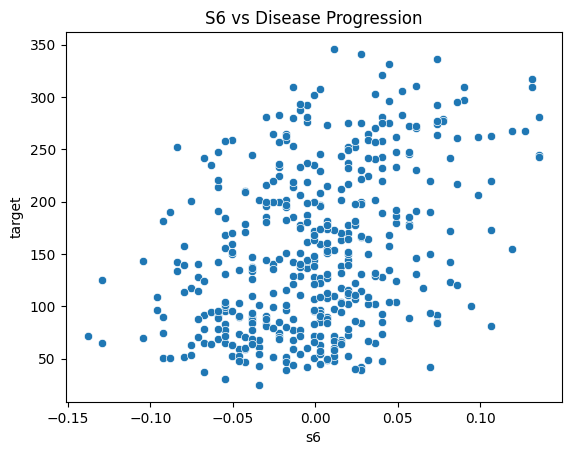

In [ ]:
sns.scatterplot(x='bmi', y='target', data=df)
plt.title("BMI vs Disease Progression")
plt.show()

sns.scatterplot(x='bp', y='target', data=df)
plt.title("BP vs Disease Progression")
plt.show()

sns.scatterplot(x='s3', y='target', data=df)
plt.title("S3 vs Disease Progression")
plt.show()

sns.scatterplot(x='s4', y='target', data=df)
plt.title("S4 vs Disease Progression")
plt.show()

sns.scatterplot(x='s5', y='target', data=df)
plt.title("S5 vs Disease Progression")
plt.show()

sns.scatterplot(x='s6', y='target', data=df)
plt.title("S6 vs Disease Progression")
plt.show()

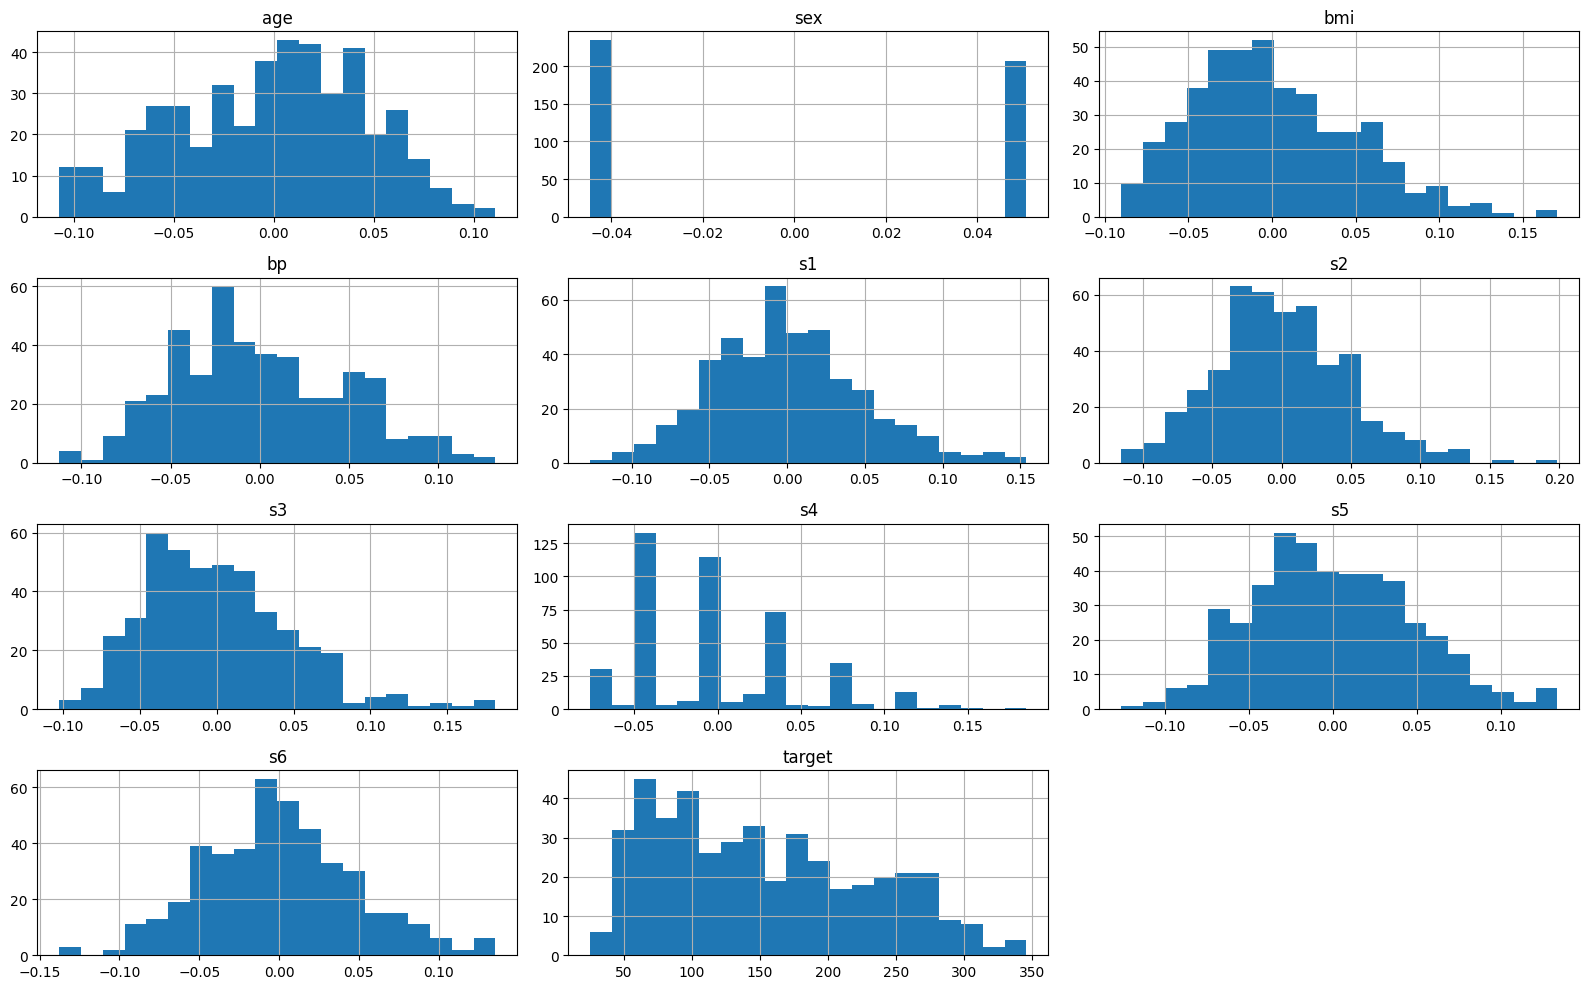

In [ ]:
df.hist(bins=20, figsize=(16, 10))
plt.tight_layout()
plt.show()

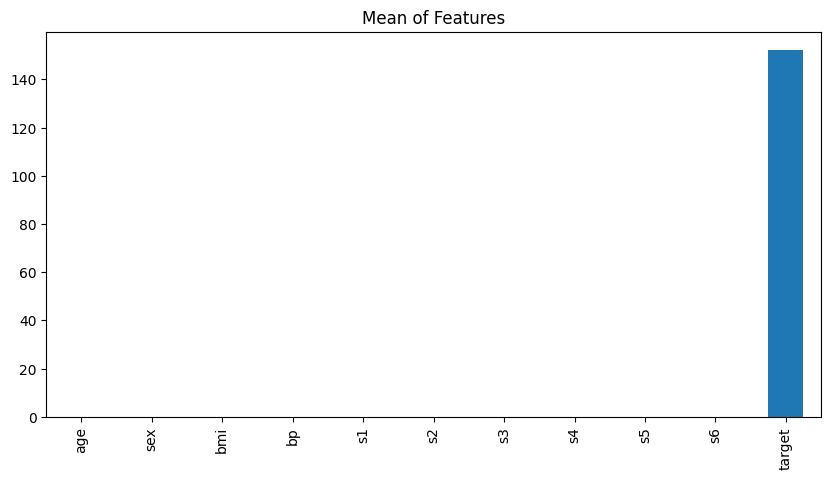

In [ ]:
df.mean().plot(kind='bar', figsize=(10, 5))
plt.title("Mean of Features")
plt.show()

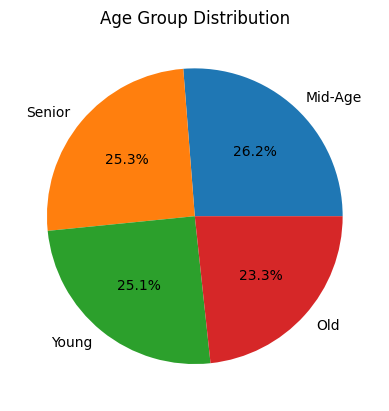

In [ ]:
df['age_group'] = pd.qcut(df['age'], 4, labels=['Young', 'Mid-Age', 'Senior', 'Old'])
df['age_group'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Age Group Distribution")
plt.ylabel('')
plt.show()

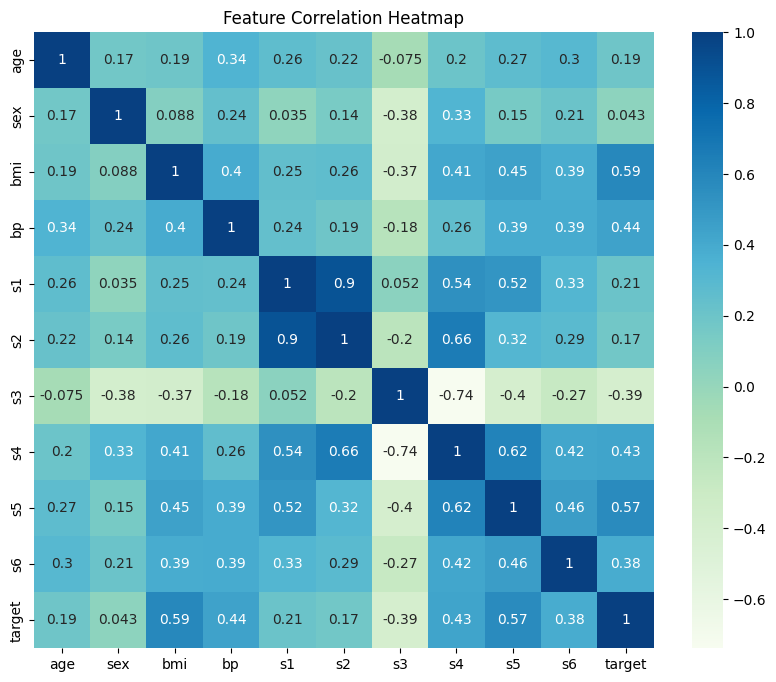

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('age_group', axis=1).corr(), annot=True, cmap='GnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

#Data Processing


In [ ]:
print("Null values before:\n", df.isnull().sum())
print("Null values after:\n", df.isnull().sum())

Null values before:
 age          0
sex          0
bmi          0
bp           0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
target       0
age_group    0
dtype: int64
Null values after:
 age          0
sex          0
bmi          0
bp           0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
target       0
age_group    0
dtype: int64


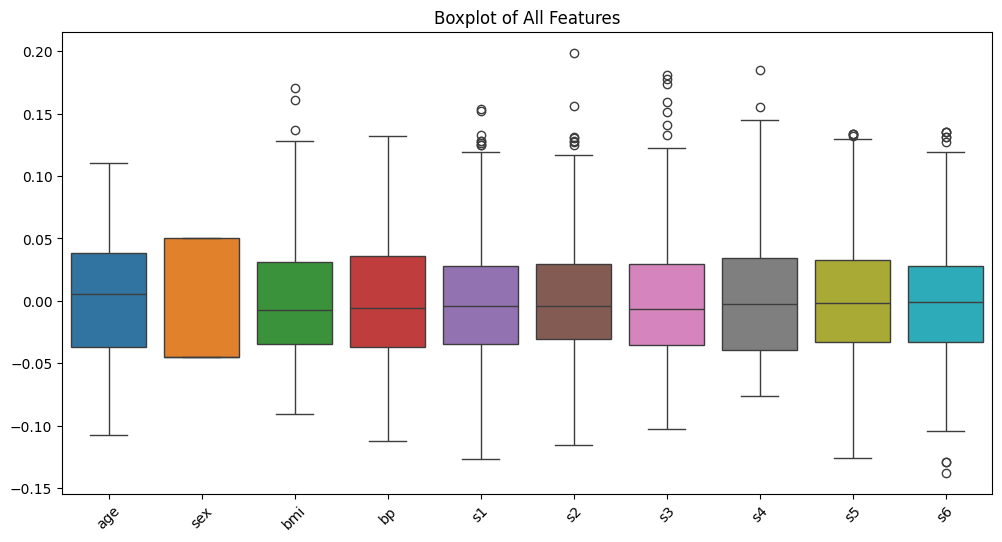

In [ ]:
features_only = df.drop(columns=['target', 'age_group'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=features_only)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

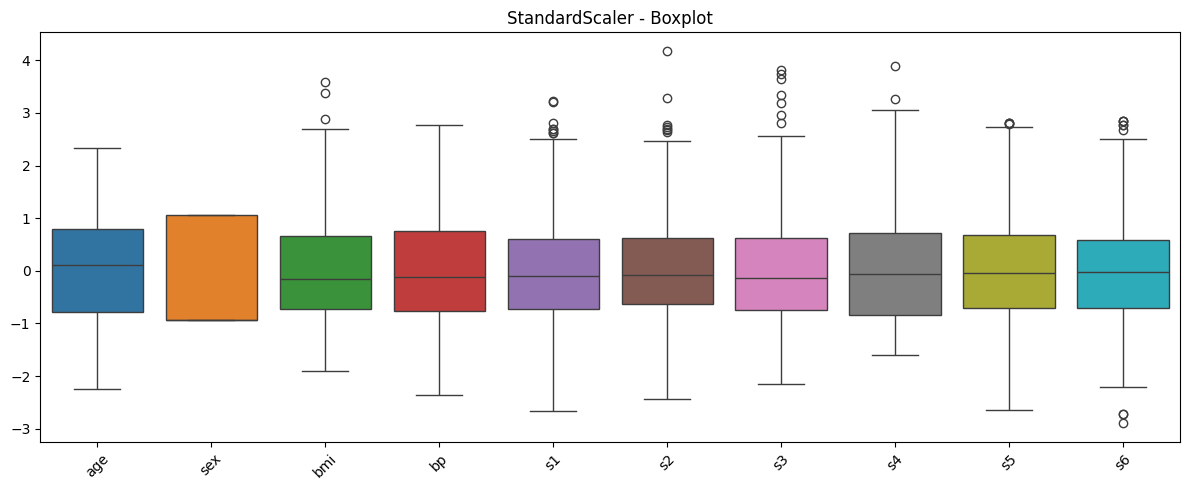

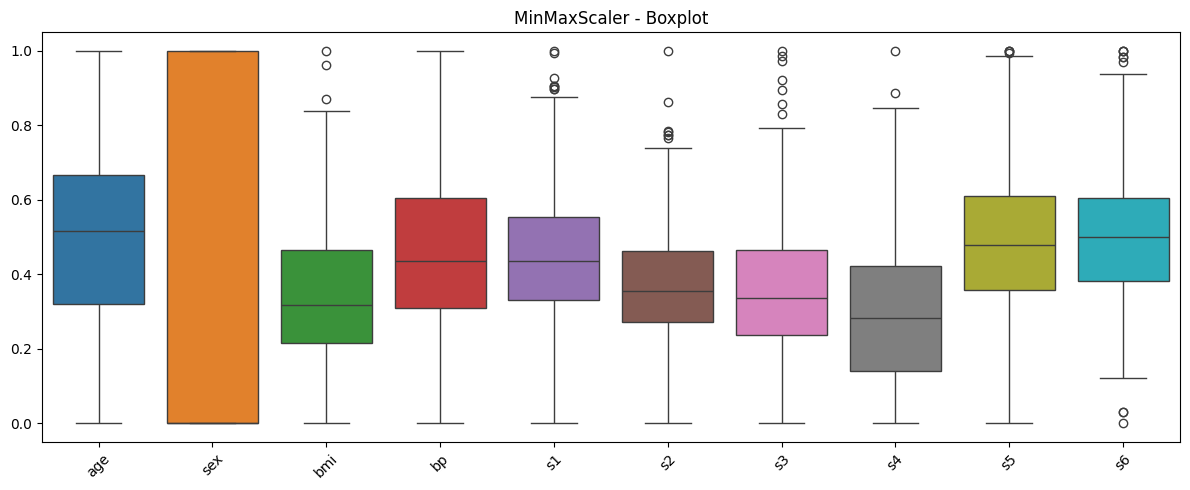

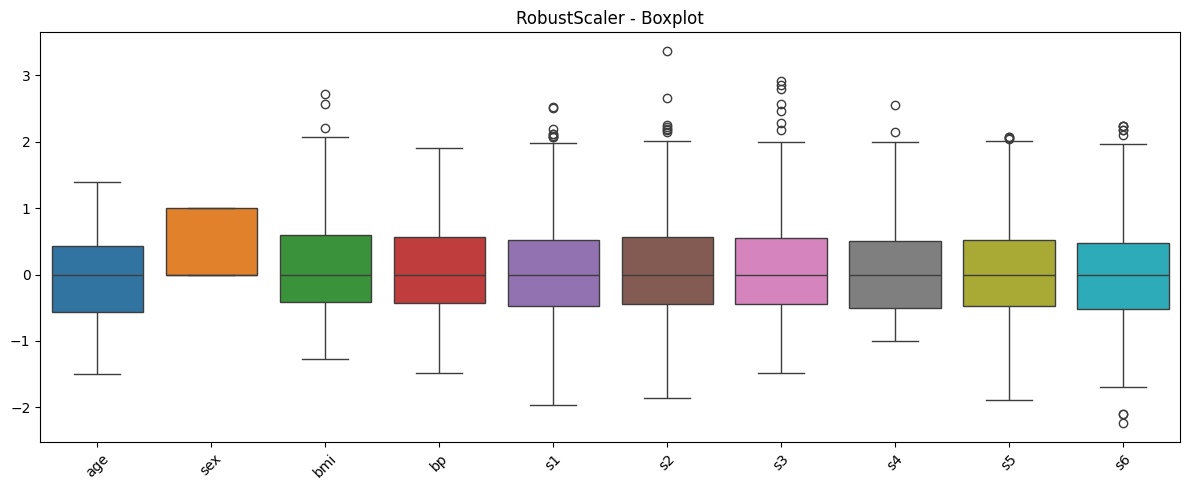

In [58]:
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(X)
    scaled_data[name] = pd.DataFrame(scaled, columns=X.columns)

for name, df_scaled in scaled_data.items():
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_scaled)
    plt.title(f"{name} - Boxplot")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

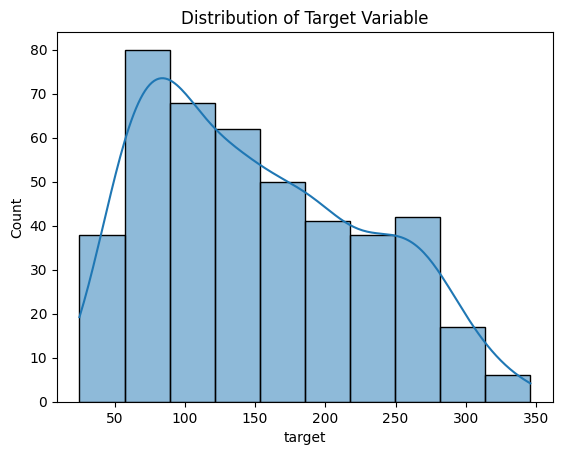

In [ ]:
sns.histplot(y, kde=True)
plt.title("Distribution of Target Variable")
plt.show()

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def regression_scores(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\nMSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}\n")
    return r2

#Models

In [ ]:
pip install xgboost tensorflow

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
r2_xgb = regression_scores(y_test, y_pred_xgb, "Tuned XGBoost Regressor")


Tuned XGBoost Regressor:
MSE: 3137.76, MAE: 44.56, RMSE: 56.02, R²: 0.4078



In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = regression_scores(y_test, y_pred_lr, "Linear Regression")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = regression_scores(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression:
MSE: 2900.19, MAE: 42.79, RMSE: 53.85, R²: 0.4526

Random Forest Regressor:
MSE: 2953.63, MAE: 44.16, RMSE: 54.35, R²: 0.4425



In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, validation_split=0.1, verbose=0)

# Predict + evaluate
y_pred_ann = model.predict(X_test).flatten()
r2_ann = regression_scores(y_test, y_pred_ann, "Improved ANN")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Improved ANN:
MSE: 3005.19, MAE: 42.62, RMSE: 54.82, R²: 0.4328



#Evaluation

In [ ]:
model_names = ["Linear Regression", "Random Forest", "XGBoost Regressor", "Improved ANN"]
r2_scores = [r2_lr, r2_rf, r2_xgb, r2_ann]

# Re-predict for all models to get all metrics
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_ann = model.predict(X_test).flatten()


results = []
results.append(regression_scores(y_test, y_pred_lr, "Linear Regression"))
results.append(regression_scores(y_test, y_pred_rf, "Random Forest Regressor"))
results.append(regression_scores(y_test, y_pred_xgb, "XGBoost Regressor"))
results.append(regression_scores(y_test, y_pred_ann, "Improved ANN"))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Linear Regression:
MSE: 2900.19, MAE: 42.79, RMSE: 53.85, R²: 0.4526

Random Forest Regressor:
MSE: 2953.63, MAE: 44.16, RMSE: 54.35, R²: 0.4425

XGBoost Regressor:
MSE: 3137.76, MAE: 44.56, RMSE: 56.02, R²: 0.4078

Improved ANN:
MSE: 2968.86, MAE: 44.85, RMSE: 54.49, R²: 0.4396



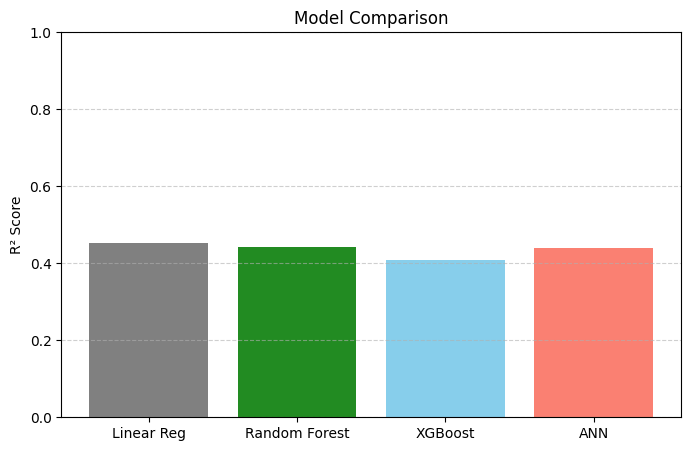

In [ ]:
models = ['Linear Reg', 'Random Forest', 'XGBoost', 'ANN']
scores = [r2_lr, r2_rf, r2_xgb, r2_ann]

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['gray', 'forestgreen', 'skyblue', 'salmon'])
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


###**Peace of our Mind**

After trying everything to increase the score of this dataset, nothing much increased except by point 1 or 2. The reason for the low score is because the dataset is missing features that might helped, and also contains inherit noise. This is a real-world clinical data, so there's only so much any model can do. If you look in the **Heatmap**, there you can see the highest value it has is around 0.6 (~0.59 & 0.57). The score might increase with "different diabetes dataset" conatining more features and data, if you want to try, be our guest.

Happy Learning 💓.